In [1]:
#CS 513: Knowledge Discovery and Data 
#Group Members: Danica Lacuesta, Joelle An, and Raj Rana 
#Author: Danica Lacuesta
#20014543
#"I pledge my honor that I have abided by the Stevens Honor System"
#Purpose: This project analyzes digital activity patterns to classify user stress levels and identify the behavioral features that most strongly impact predictive accuracy.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("data/df_modified.csv")
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0


In [6]:
df["Stress_Binary"] = (df["Stress_Level(1-10)"] >= 6).astype(int)
df = df.drop("Stress_Level(1-10)", axis=1)

df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube,Stress_Binary
0,44,3.1,7.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0,1
1,30,5.1,7.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0,1
2,23,7.4,6.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1,1
3,36,5.7,7.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0,1
4,34,7.0,4.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0,1


In [7]:
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

numeric_cols = [
    "Daily_Screen_Time(hrs)",
    "Sleep_Quality(1-10)",
    "Happiness_Index(1-10)",
    "Days_Without_Social_Media",
    "Exercise_Frequency(week)",
    "Age"
]

for col in numeric_cols:
    clip_outliers(df, col)

df[numeric_cols].describe()

,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Happiness_Index(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Age
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.528000,6.304000,8.376000,3.134000,2.444000,32.988000
std,1.729068,1.529792,1.524228,1.858751,1.416643,9.960637
min,1.000000,2.000000,4.000000,0.000000,0.000000,16.000000
25%,4.300000,5.000000,7.000000,2.000000,1.000000,24.000000
50%,5.600000,6.000000,9.000000,3.000000,2.000000,34.000000
75%,6.700000,7.000000,10.000000,5.000000,3.000000,41.000000
max,10.300000,10.000000,10.000000,9.000000,6.000000,49.000000


In [8]:
X = df.drop("Stress_Binary", axis=1)
y = df["Stress_Binary"]

X.head(), y.head()

(   Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
 0   44                     3.1                  7.0   
 1   30                     5.1                  7.0   
 2   23                     7.4                  6.0   
 3   36                     5.7                  7.0   
 4   34                     7.0                  4.0   
 
    Days_Without_Social_Media  Exercise_Frequency(week)  Happiness_Index(1-10)  \
 0                        2.0                       5.0                   10.0   
 1                        5.0                       3.0                   10.0   
 2                        1.0                       3.0                    6.0   
 3                        1.0                       1.0                    8.0   
 4                        5.0                       1.0                    8.0   
 
    Gender_Female  Gender_Male  Gender_Other  Social_Media_Platform_Facebook  \
 0              0            1             0                               1   
 1      

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((350, 15), (150, 15))

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", log_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.8866666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.93      0.92      0.93       114

    accuracy                           0.89       150
   macro avg       0.84      0.85      0.85       150
weighted avg       0.89      0.89      0.89       150



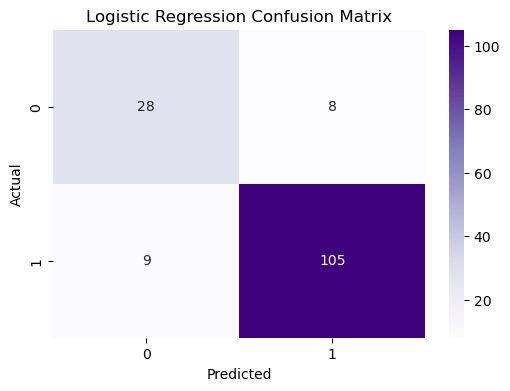

In [12]:
cm_log = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Purples")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

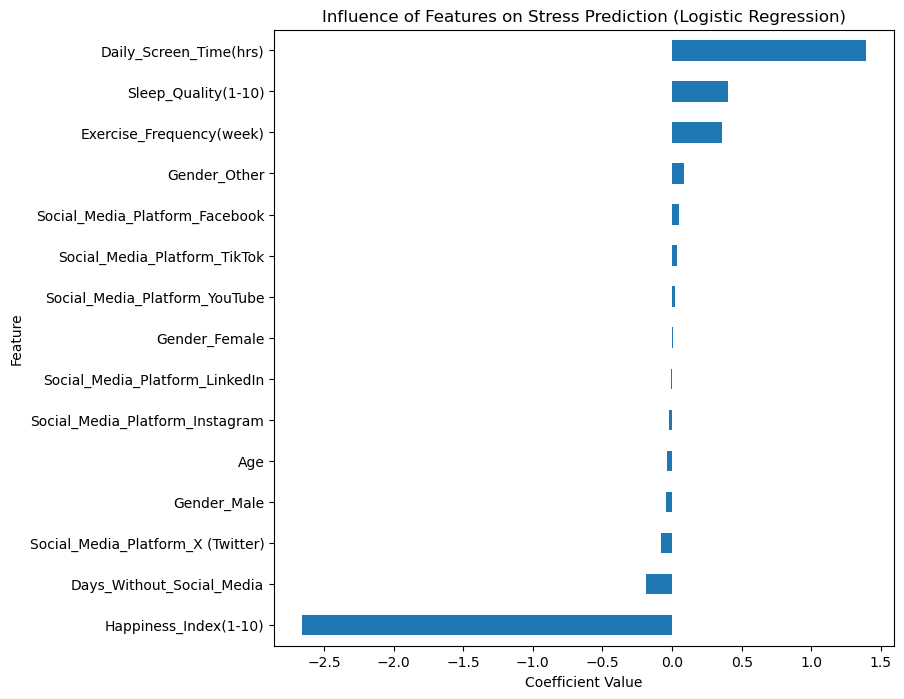

Age                                 -0.035571
Daily_Screen_Time(hrs)               1.391421
Sleep_Quality(1-10)                  0.400761
Days_Without_Social_Media           -0.188147
Exercise_Frequency(week)             0.355963
Happiness_Index(1-10)               -2.655733
Gender_Female                        0.009907
Gender_Male                         -0.045190
Gender_Other                         0.084295
Social_Media_Platform_Facebook       0.050790
Social_Media_Platform_Instagram     -0.022188
Social_Media_Platform_LinkedIn      -0.007052
Social_Media_Platform_TikTok         0.034151
Social_Media_Platform_X (Twitter)   -0.079579
Social_Media_Platform_YouTube        0.024496
dtype: float64

In [13]:
log_coeffs = pd.Series(log_model.coef_[0], index=X.columns)

plt.figure(figsize=(8,8))
log_coeffs.sort_values().plot(kind="barh")
plt.title("Influence of Features on Stress Prediction (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

log_coeffs

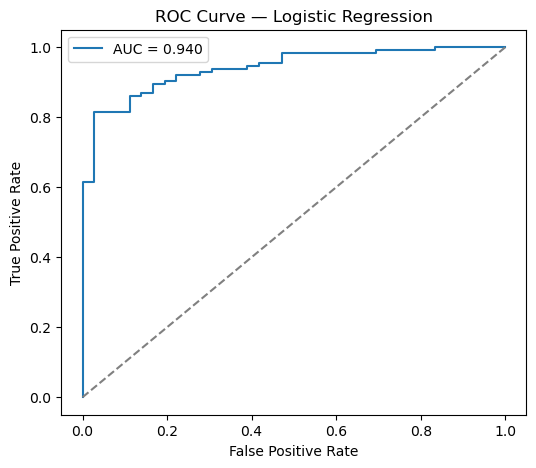

In [14]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (stress = 1)
log_proba = log_model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, log_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()

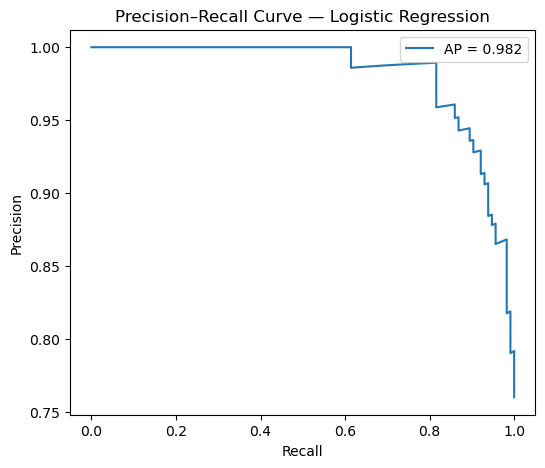

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, log_proba)
avg_precision = average_precision_score(y_test, log_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.legend()
plt.show()


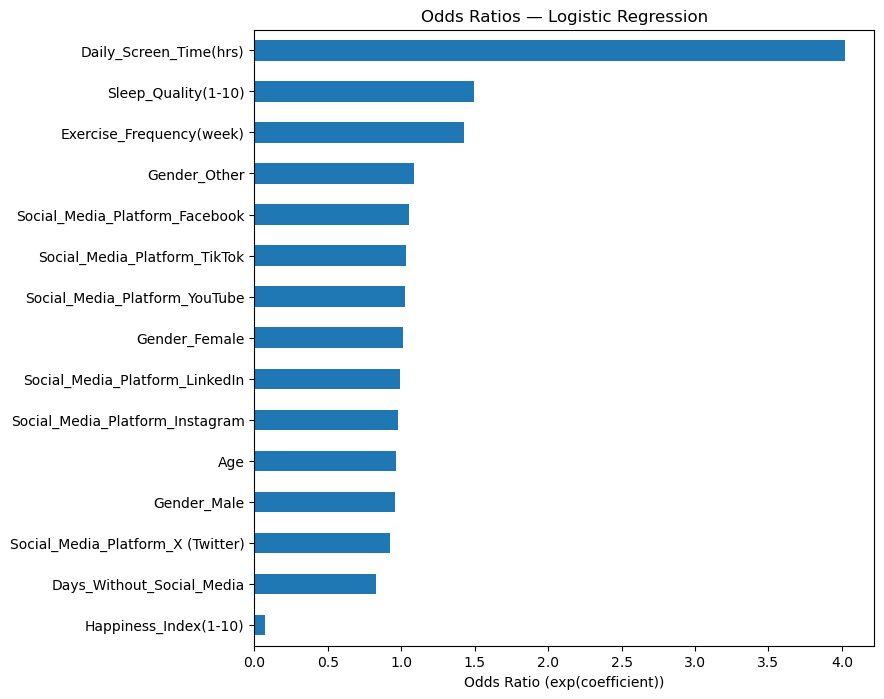

Age                                  0.965054
Daily_Screen_Time(hrs)               4.020561
Sleep_Quality(1-10)                  1.492960
Days_Without_Social_Media            0.828493
Exercise_Frequency(week)             1.427555
Happiness_Index(1-10)                0.070247
Gender_Female                        1.009956
Gender_Male                          0.955816
Gender_Other                         1.087950
Social_Media_Platform_Facebook       1.052102
Social_Media_Platform_Instagram      0.978056
Social_Media_Platform_LinkedIn       0.992972
Social_Media_Platform_TikTok         1.034741
Social_Media_Platform_X (Twitter)    0.923505
Social_Media_Platform_YouTube        1.024798
dtype: float64

In [16]:
# Coefficients (raw)
coeffs = pd.Series(log_model.coef_[0], index=X.columns)

# Convert to Odds Ratios
odds_ratios = np.exp(coeffs)

plt.figure(figsize=(8,8))
odds_ratios.sort_values().plot(kind="barh")
plt.title("Odds Ratios — Logistic Regression")
plt.xlabel("Odds Ratio (exp(coefficient))")
plt.show()

odds_ratios


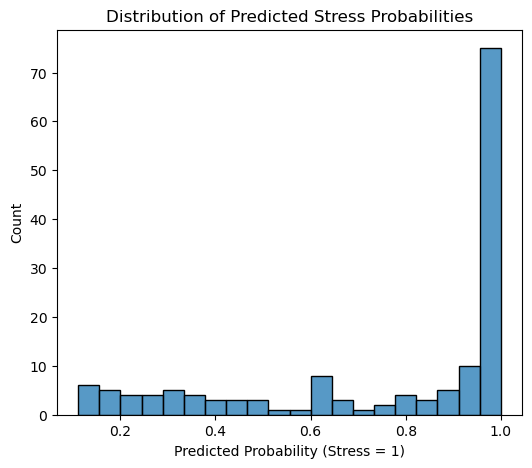

In [17]:
plt.figure(figsize=(6,5))
sns.histplot(log_proba, bins=20, kde=False)
plt.title("Distribution of Predicted Stress Probabilities")
plt.xlabel("Predicted Probability (Stress = 1)")
plt.ylabel("Count")
plt.show()
